In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad, odeint, solve_ivp

# conjunto de eqs. diferenciais de 1ª ordem
# que representam a eq. do mov. do pêndulo simples
def dydt2(t, y, g, L):
    theta, omega = y
    dydt = [omega, -g/L*np.sin(theta)]
    return dydt

# solução aproximada para pequenas oscilações
def dydt_aprox(y, t, g, L):
    theta, omega = y
    return [y[1], -g/L*y[0]]

# calcula o período do pêndulo baseado na solução periódica 
# obtida da solução do PVI
def period(omega):
    # encontra as mudanças de sinal
    idx = np.where(np.sign(omega[:-1]) != np.sign(omega[1:]))[0] + 1
    # considera o período como a média de todos os períodos 
    deltaT = np.mean(np.diff(t[idx[::2]]))
    return deltaT

In [10]:
# constantes e parâmetros
g = 9.8
L = 2
theta0 = math.radians(85)
omega0 = 0.0
y0 = [theta0, omega0]
n = 2**18
rtol = 1e-7
atol = 1e-14
t = np.linspace(0, 10, n+1)

In [11]:
# método (preferido) para resolver o PVI
sol = solve_ivp(dydt2, [t[0], t[-1]], y0, t_eval=t, args=(g, L), rtol=rtol, atol=atol)
theta = sol.y[0]
omega = sol.y[1]

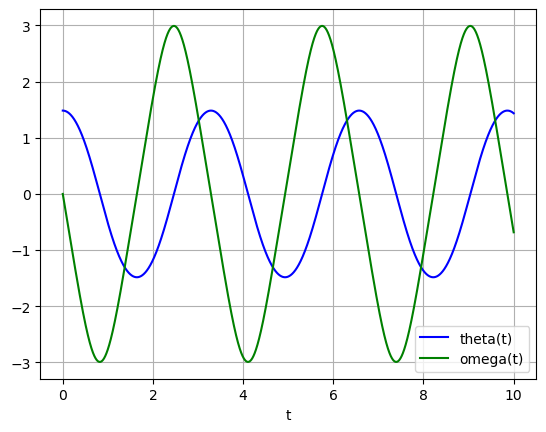

In [12]:
plt.plot(sol.t, theta, 'b', label='theta(t)')
plt.plot(sol.t, omega, 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [13]:
dt = period(theta)
print("Período obtido", dt)

Período obtido 3.2866287231445312


In [14]:
# fórmula tradicional (aproximada) do perído de um pêndulo simples
T = 2.*np.pi*np.sqrt(L/g)
print("Período aproximado:", T)

Período aproximado: 2.838453790227457


In [15]:
erro_perc = 100*abs(dt - T)/dt
print("Erro percentual da aproximação", f"{erro_perc:.1f}%")

Erro percentual 13.6%


In [24]:
# fórmula precisa do período
def integrand(theta, theta0):
    return 1/(np.sqrt(np.cos(theta) - np.cos(theta0)))

C = 4*np.sqrt(L/(2*g))
I = quad(integrand, 0, theta0, args=(theta0,))[0]
T = C*I # não está OK?!
print("Período exato:", T)

Período exato: 3.286630612055369


In [28]:
erro_perc = 100*abs(dt - T)/dt
print("Erro percentual da solução numérica", f"{erro_perc:.2e}%")

Erro percentual da solução numérica 5.75e-05%
